## Análisis de velocidad y aceleración de mecanismo manivela-corredera

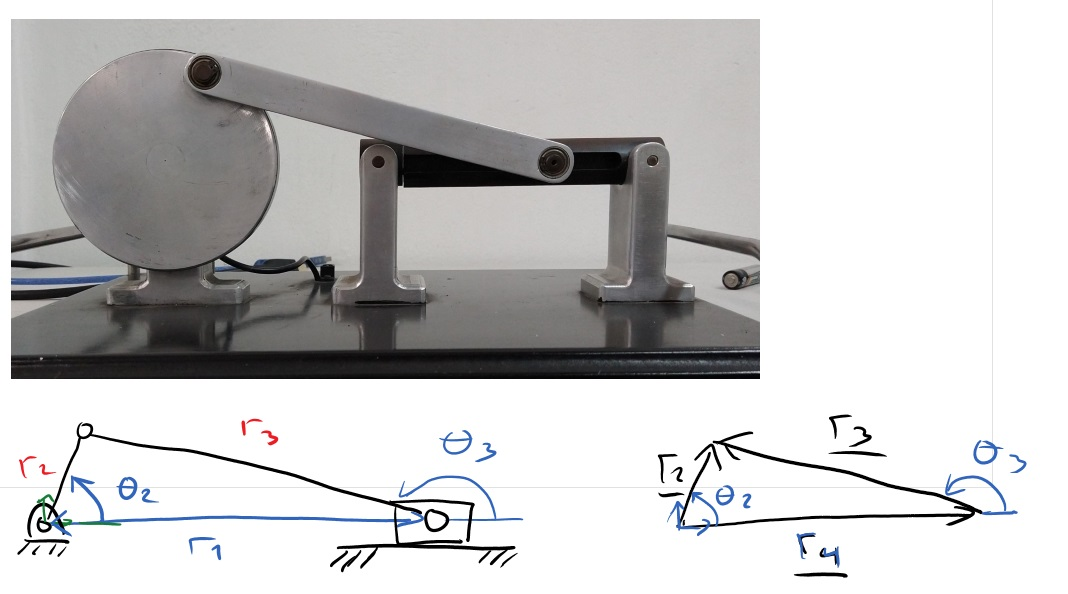

## Análisis vectorial

Partiendo de este diagrama vectorial, podemos obtener la siguiente ecuación vectorial

$\overrightarrow{r_{2}}-\overrightarrow{r_{3}}-\overrightarrow{r_{4}}=0$ , o su equivalente $\overrightarrow{r_{2}}+\overrightarrow{r_{3'}}-\overrightarrow{r_{4}}=0$(1)

cuyas ecuaciones escalares correspondientes son

$r2\cdot cos(\theta_{2})-r3\cdot cos(\theta_{3})-r4=0$, (2)

$r2\cdot sin(\theta_{2})-r3\cdot sin(\theta_{3})=0$ (3)

En este cuaderno desarrollaremos el análisis de velocidad y aceleración. Para esto debemos contar con el análisis de posición correctamente desarrollado.

Para ver este desarrollo con las anotaciones correspondientes:

### 

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from matplotlib.animation import FuncAnimation


def manivelaCorredera(condIni, params):
    #variable de entrada y parámetros
    ## Primero la variable de entrada
    th2 = params[0]
    ## Luego los parámetros
    r2 = params[1]
    r3 = params[2]
    
    # las condiciones iniciales deben darse para que el método funcione
    th3 = condIni[0]
    r4 = condIni[1]
    
    # creamos el vector donde quedará la salida, inicialmente con ceros
    Y = np.zeros(2)
    # Definimos las ecuaciones escalares no lineales
    Y[0] = r2*np.cos(th2) - r3*np.cos(th3) - r4;
    Y[1] = r2*np.sin(th2) - r3*np.sin(th3);
    
    return Y

# le damos valores a los parámetros y variables

r2 = 5
r3 = 17.5
th2 = np.deg2rad(0)

# Declaramos las condiciones iniciales

th2 = np.deg2rad(0)
varEntrada = th2
params = [varEntrada,r2,r3]

print("Parámetros: ",params)

th3 = np.deg2rad(180)
r4 = 22.5

x0 = np.array([th3,r4])
print("Condiciones iniciales: ",x0)
# ...y probamos la función

Y = manivelaCorredera(x0, params)
print("Evaluación de la función: ",Y)

# si el resultado es un array con valores cercanos a cero, la implementación del análisis está bien. Como regla, si el valor entero es 0, sirve.
# 
# Ahora especificamos el número de iteraciones

numpos = 50

# Luego definimos el vector que contiene los valores de la variable de entrada que queremos analizar

th2v = np.linspace(0,2*np.pi,numpos)

# Y continuamos con el resto del programa. Esto al fin y al cabo es una prueba.

th3v = np.zeros(numpos)
r4v = np.zeros(numpos)
exitflagV = np.zeros(numpos)

# Probar fsolve

[th3,r4] = fsolve(manivelaCorredera,x0, args = params)

print("Solución usando fsolve: ",np.rad2deg(th3),r4,)

# esto debe dar valores de las variables secundarias, verificar con análisis gráfico
# 
# ## Solución al sistema de ecuaciones con fsolve
for i in range(0,numpos):
    params[0] = th2v[i]
    q,info,exitflagV[i],mensaje = fsolve(manivelaCorredera,
                                        x0, 
                                        args = params,
                                        full_output = True)
    th3v[i] = q[0]
    r4v[i] = q[1]
    x0 = q
    if exitflagV[i] != 1:
        print('Error en la iteración ' + str(i))
        break
if i+1 == numpos:
    print('se ejecutaron todas las iteraciones: ' + str(numpos))
    print(np.rad2deg(th3v))
    print(r4v)

Parámetros:  [0.0, 5, 17.5]
Condiciones iniciales:  [ 3.14159265 22.5       ]
Evaluación de la función:  [ 0.0000000e+00 -2.1431319e-15]
Solución usando fsolve:  180.0 22.5
se ejecutaron todas las iteraciones: 50
[180.         177.90615636 175.84397443 173.84496392 171.94029026
 170.1605047  168.53516675 167.0923405  165.8579643  164.85511629
 164.10322405 163.61729097 163.40722681 163.47736961 163.82626713
 164.44675072 165.32629014 166.44757758 167.7892605  169.32673393
 171.03291049 172.8789073  174.83461413 176.8691328  178.95109764
 181.04890236 183.1308672  185.16538587 187.1210927  188.96708951
 190.67326607 192.2107395  193.55242242 194.67370986 195.55324928
 196.17373287 196.52263039 196.59277319 196.38270903 195.89677595
 195.14488371 194.1420357  192.9076595  191.46483325 189.8394953
 188.05970974 186.15503608 184.15602557 182.09384364 180.        ]
[22.5        22.44726576 22.2904562  22.0337035  21.68373717 21.24964897
 20.74256728 20.17524747 19.56159075 18.91611133 18.25

## Análisis de velocidad: teoría

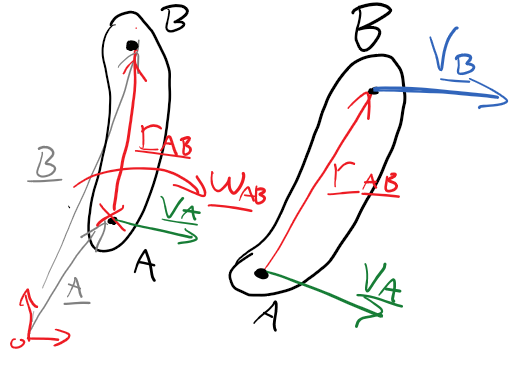

Aplicaremos la siguiente ecuación para modelar la velocidad de cada cuerpo rígido (barra) del mecanismo:

$\overrightarrow{V_B} = \overrightarrow{V_A}+\overrightarrow{\omega}\times \overrightarrow{r_{AB}}$, (4)

Donde $\overrightarrow{\omega}$ es el vector de velocidad angular de la barra analizada.

Usualmente no tenemos el valor de $\overrightarrow{\omega}$, ya que las componentes escalares de esta son

$\overrightarrow{\omega} = \begin{bmatrix}
0 & 0 & \dot{\theta} 
\end{bmatrix}$ (5)

siendo $\dot{\theta}$ la magnitud de la velocidad angular de la barra analizada. Esta cantidad la obtenemos derivando con respecto al tiempo las ecuaciones de posición escalares, obtenidas a partir de las ecuaciones de cierre vectorial.

### Velocidad de la barra de entrada

Si la barra analizada es una barra de entrada, la derivada con respecto al tiempo de la variable de entrada asociada **debe ser conocida para poder completar el análisis**. Si la variable de entrada es un ángulo:

$\frac{\mathrm{d} \theta}{\mathrm{d} t} = \dot{\theta}$

Si la variable de entrada es una distancia:

$\frac{\mathrm{d} r}{\mathrm{d} t} = \dot{r}$

### Derivadas de las ecuaciones de cierre vectorial

Derivando (1) y (2) con respecto al tiempo tenemos

$-r_2sin(\theta_{2})\dot{\theta_{2}} + r_3sin(\theta_{3})\dot{\theta_{3}} - \dot{r_{4}}=0$, (6)

$r_2cos(\theta_{2})\dot{\theta_{2}} - r_3cos(\theta_{3})\dot{\theta_{3}}=0$. (7)

Podemos notar que este sistema de ecuaciones es LINEAL, por lo que podemos usar álgebra lineal para resolverlo. Para esto planteamos el sistema en forma matricial, específicamente de la forma $Ax=b$. En este caso

$A = \begin{bmatrix}
- r_3sin(\theta_{3}) & -1\\ 
r_3cos(\theta_{3}) & 0
\end{bmatrix}$,

$x = \begin{bmatrix}
\dot{\theta_{3}}\\ 
\dot{r_{4}}
\end{bmatrix}$ y

$b = \begin{bmatrix}
r_2sin(\theta_{2})\dot{\theta_{2}}\\ 
-r_2cos(\theta_{2})\dot{\theta_{2}}
\end{bmatrix}$

### Variable de entrada

En este caso, la variable de entrada es $\theta_2$, por lo cual debemos dar valores a $\dot{\theta_2}$. Vamos a asumir en este caso que la manivela rota a 60 rev/m, i.e., 1 rev/s

In [83]:
th2p = 2*np.pi # velocidad en radianes por segundo

### Solución del sistema de ecuaciones lineal

Usaremos la función solve del módulo numpy.linalg. Descomente la siguiente línea para revisar la ayuda

In [84]:
#help(np.linalg.solve)
#dir(np.linalg)

Hagámoslo para una sola posición inicialmente

In [85]:
pos = 15 #posicion 15 de numpos posiciones
th2 = th2v[pos]
th3 = th3v[pos]
r4 = r4v[pos]
print("theta2= ",np.rad2deg(th2),"theta3= ",np.rad2deg(th3),"r4= ",r4)

am = [[r3*np.sin(th3),-1],
      [-r3*np.cos(th3),0]]
bv = [r2*np.sin(th2)*th2p,
      -r2*np.cos(th2)*th2p]
print(am,bv)
[th3p,r4p] = np.linalg.solve(am,bv) # el resultado de solve es el vector x
print(th3p,r4p)

theta2=  110.20408163265306 theta3=  164.4467507181718 r4=  15.132353993812243
[[4.692342110248806, -1], [16.859179265918783, 0]] [29.482855003375327, 10.849963177766188]
0.6435641383622771 -26.463031896292026


## Verificación numérica

Podemos hacer una verificación con base en el análisis de posición usando derivación numérica. Para esto necesitaremos las gráficas de posición de las variables secundarias respecto a la de entrada

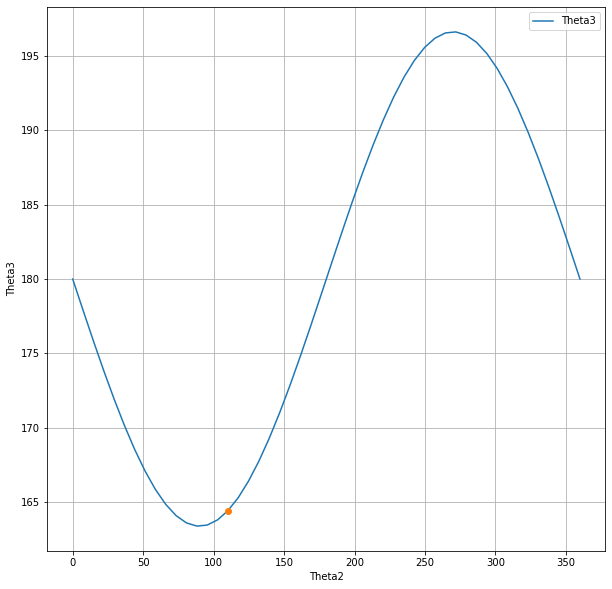

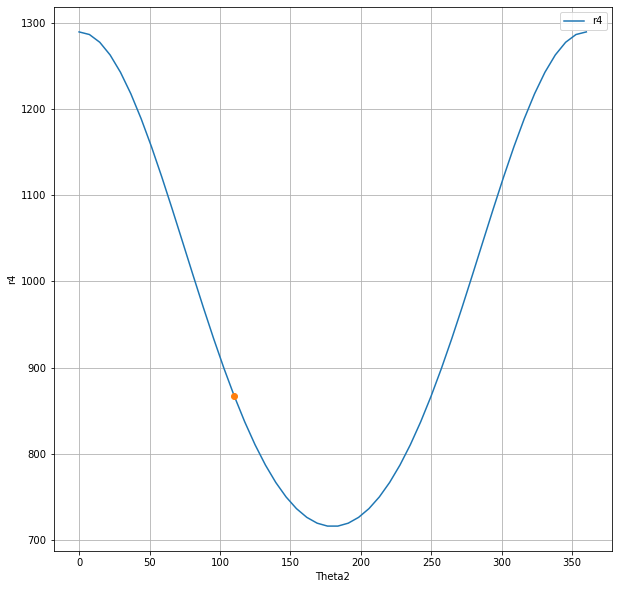

In [86]:
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th3v))
plt.rcParams['figure.figsize'] = [10, 10]
plt.legend(["Theta3"])
plt.xlabel("Theta2")
plt.ylabel("Theta3")
plt.plot(np.rad2deg(th2v[pos]),np.rad2deg(th3v[pos]),'o')
plt.grid()
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(r4v))
plt.legend(["r4"])
plt.xlabel("Theta2")
plt.ylabel("r4")
plt.plot(np.rad2deg(th2v[pos]),np.rad2deg(r4v[pos]),'o')
plt.grid()

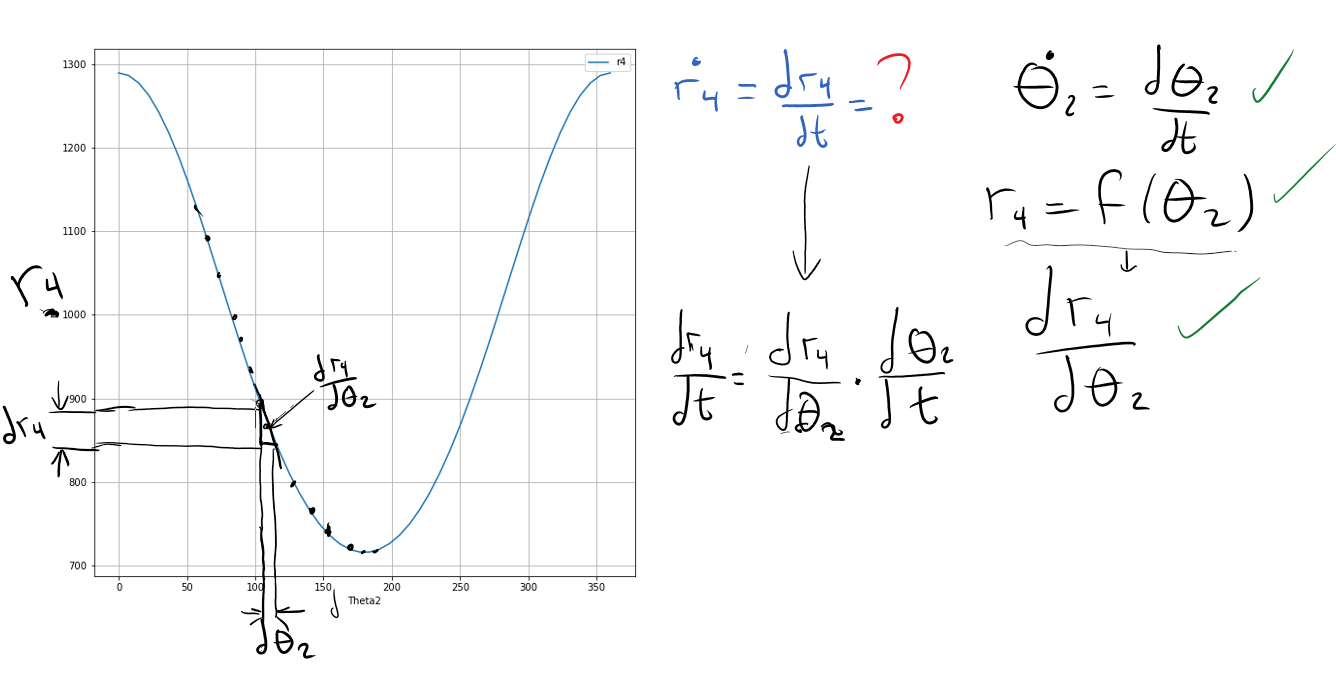

Tips para presentar mejor las gráficas: https://towardsdatascience.com/making-plots-in-jupyter-notebook-beautiful-more-meaningful-23c8a35c0d5d#:~:text=By%20default%2C%20the%20size%20of,images%20have%20even%20smaller%20dimensions.

In [87]:
difth3 = (th3v[pos+1]-th3v[pos-1])
difth2 = (th2v[pos+1]-th2v[pos-1])
dth3_th2 = difth3/difth2
difr4 = (r4v[pos+1]-r4v[pos-1])
dr4_th2 = difr4/difth2
#print(difth4)
th3pNum = dth3_th2 * th2p
r4pNum = dr4_th2 * th2p
print(th3p,th3pNum)
print(r4p,r4pNum)

0.6435641383622771 0.6414183384441184
-26.463031896292026 -26.416911396113186


## Velocidad de un punto

Ahora si podemos usar la ecuación de velocidad de un punto de cualquier barra (4). 

Primero definamos los puntos que vamos a analizar:

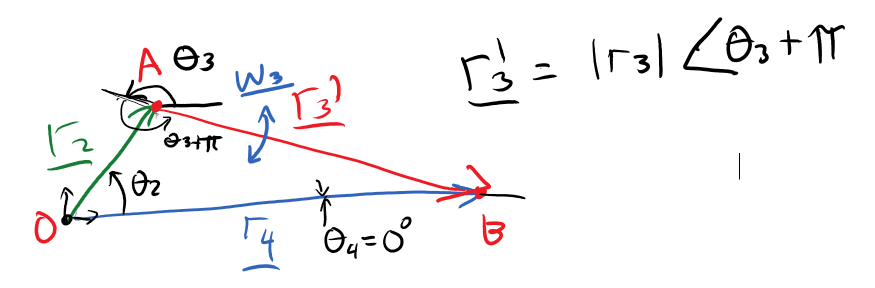

Ahora definamos cada elemento:

In [88]:
w2v = [0,0,th2p]
r2v = [r2*np.cos(th2),r2*np.sin(th2),0]
velA = np.cross(w2v,r2v)
print(velA)

[-29.482855   -10.84996318   0.        ]


El vector $\overrightarrow{V_A}$ tiene las componentes de la velocidad del punto A en mm/s

Ahora para calcular $\overrightarrow{V_B}$

Nota: recordemos que debemos usar el vector $r_{3'}$, cuya dirección es $\theta_3 + \pi$

In [89]:
w3v = [0,0,th3p]
r3v = [r3*np.cos(th3+np.pi),r3*np.sin(th3+np.pi),0]
velB = velA + np.cross(w3v,r3v)
print(velB)

[-26.4630319   0.          0.       ]


## Graficar vectores de velocidad

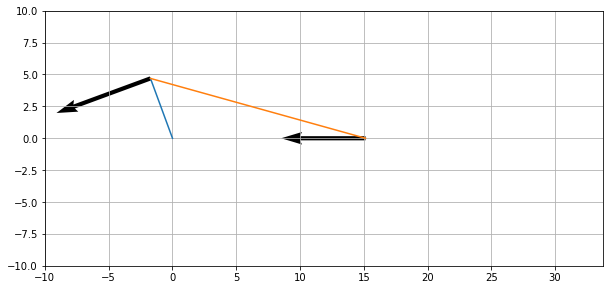

In [90]:
# ## Ubicación de puntos para animación
Ox = 0
Oy = 0
Ax = r2*np.cos(th2v)
Ay = r2*np.sin(th2v)
Bx = Ax - r3*np.cos(th3v)
By = Ay - r3*np.sin(th3v)

# ## Preparación de animación
fig = plt.figure()
plt.rcParams['figure.figsize'] = [10, 10]
hr2 = plt.plot([Ox,Ax[pos]],[Oy,Ay[pos]])
hr3 = plt.plot([Bx[pos],Ax[pos]],[By[pos],Ay[pos]])

hVA = plt.quiver(Ax[pos], Ay[pos], velA[0], velA[1],scale_units='xy', scale=4)
hVB = plt.quiver(Bx[pos], By[pos], velB[0], velB[1],scale_units='xy', scale=4)

plt.axis("scaled")
plt.xlim(-r2*2,(r2+r3)*1.5)
plt.ylim(-r2*2,r2*2)
plt.grid()
plt.draw() 

In [91]:
#help(plt.quiver)

## Análisis de velocidad para un rango de valores



In [92]:
#Velocidad analitica
th3pv=np.zeros(numpos)
r4pv=np.zeros(numpos)
velAm=np.zeros((numpos,3))
velBm=np.zeros((numpos,3))
for i in range(0,numpos):
    am = [[r3*np.sin(th3v[i]),-1],
          [-r3*np.cos(th3v[i]),0]]
    bv = [r2*np.sin(th2v[i])*th2p,
          -r2*np.cos(th2v[i])*th2p]
    xv = np.linalg.solve(am,bv)
    th3pv[i] = xv[0]
    r4pv[i] = xv[1]
    
    w2v = [0,0,th2p]
    r2v = [r2*np.cos(th2v[i]),r2*np.sin(th2v[i]),0]
    velA = np.cross(w2v,r2v)
    #print(velA)
    w3v = [0,0,th3pv[i]]
    r3v = [r3*np.cos(th3v[i]+np.pi),r3*np.sin(th3v[i]+np.pi),0]
    velB = velA + np.cross(w3v,r3v)
    #print(velB)
    velAm[i,:] = velA
    velBm[i,:] = velB
    
th3pNumv=np.gradient(th3v,th2v)*th2p
r4pNumv=np.gradient(r4v,th2v)*th2p
#print(velAv)

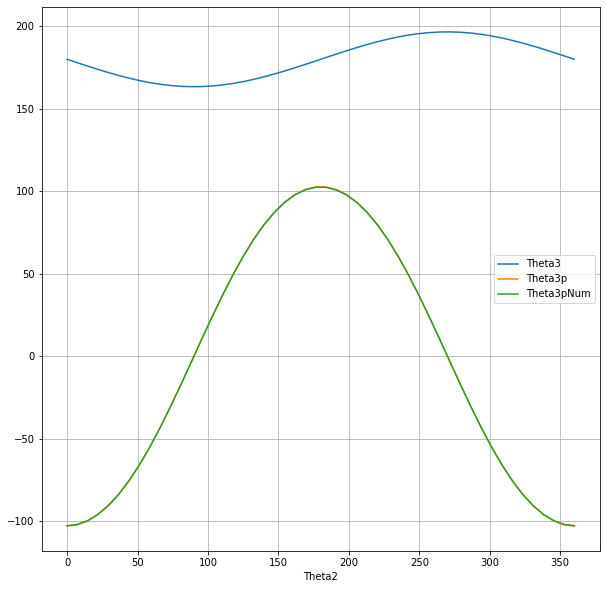

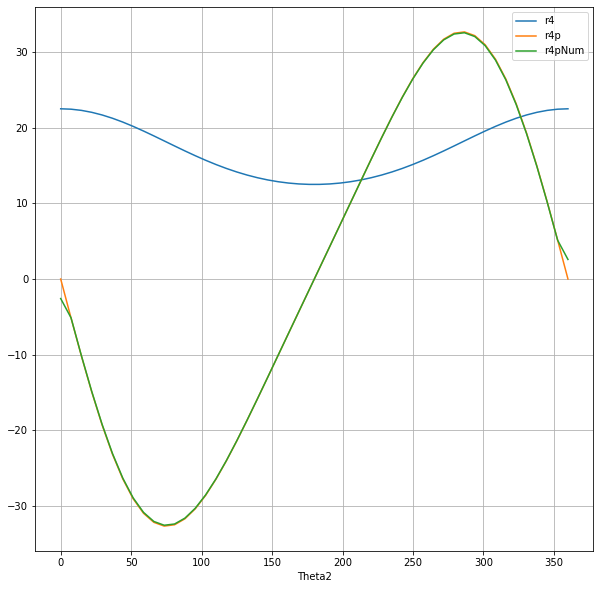

In [93]:
plt.figure()
plt.plot(np.rad2deg(th2v),np.rad2deg(th3v))
plt.plot(np.rad2deg(th2v),np.rad2deg(th3pv))
plt.plot(np.rad2deg(th2v),np.rad2deg(th3pNumv))
plt.legend(["Theta3","Theta3p","Theta3pNum"])
plt.xlabel("Theta2")
#plt.ylabel("Theta3")
plt.grid()
plt.figure()
plt.plot(np.rad2deg(th2v),r4v)
plt.plot(np.rad2deg(th2v),r4pv)
plt.plot(np.rad2deg(th2v),r4pNumv)
plt.legend(["r4","r4p","r4pNum"])
plt.xlabel("Theta2")
#plt.ylabel("Theta4")
plt.grid()

In [94]:
# ## Animación
# 
# Definimos la función que dibuja cada cuadro (plot)

# In[177]:


def animar(i):
    manivelaX = np.array([Ox,Ax[i]])
    manivelaY = np.array([Oy,Ay[i]])
    acopladorX = np.array([Bx[i],Ax[i]])
    acopladorY = np.array([By[i],Ay[i]])
    hr2[0].set_xdata(manivelaX)
    hr2[0].set_ydata(manivelaY)
    hr3[0].set_xdata(acopladorX)
    hr3[0].set_ydata(acopladorY)
    hVA.set_offsets([Ax[i], Ay[i]])
    hVA.set_UVC(velAm[i,0],velAm[i,1])

    hVB.set_offsets([Bx[i], By[i]])
    hVB.set_UVC(velBm[i,0],velBm[i,1])
    
animacion = FuncAnimation(fig, animar, interval=3000/numpos, save_count=numpos)

# Si se desea visualizar en un frame HTML5 para animaciones que queden muy pesadas en GIF (descomentar para publicación en NBViewer):

from IPython.display import HTML
HTML(animacion.to_html5_video())

In [95]:
#dir(hVA)

In [96]:
#help(hVA.set_UVC)